##Regression Classification Project
*Atajan Arashev*



10/10/2024


##Project Overview
Abstract: This project involved analyzing data from direct marketing campaigns conducted by a Portuguese banking institution, where the goal was to predict whether a client would subscribe to a term deposit (variable y). The dataset contains attributes related to the bank's clients and their interaction with the campaigns, which included phone calls. The task was to evaluate and select the best-fit models for both regression and classification tasks. For regression models, we used **Support Vector Regression (SVR)**, **Decision Tree Regression**, and **Random Forest Regression** to predict continuous outputs, applying feature selection and scaling where necessary. For classification, models such as **Logistic Regression**, **Random Forest Classifier**, and **Support Vector Classifier (SVC)** were used to predict whether a client would subscribe (yes/no). Feature engineering involved one-hot encoding for categorical variables and scaling for models sensitive to feature size, like **Logistic Regression** and **SVC**. Based on performance metrics such as **MSE**, **R² score**, **accuracy**, **precision**, **recall**, and **F1 score**, **the Random Forest** models provided the most balanced performance across tasks. The classification models especially benefited from using all encoded features, while regression models worked best with a selected set of top features.

**Features used in the project:**

* Age (numeric)
* Job (categorical, encoded)
* Marital status (categorical, encoded)
* Education (categorical, encoded)
* Default (has credit in default?) (categorical, encoded)
* Housing loan status (categorical, encoded)
* Personal loan status (categorical, encoded)
* Contact type (categorical, encoded)
* Last contact month (categorical, encoded)
* Last contact day of the week (categorical, encoded)
* Campaign (numeric, number of contacts during the campaign)
* Pdays (numeric, days since last contact)
* Previous (numeric, previous number of contacts)
* Poutcome (outcome of previous campaign, categorical, encoded)
* Emp.var.rate (numeric, employment variation rate)
* Cons.price.idx (numeric, consumer price index)
* Cons.conf.idx (numeric, consumer confidence index)
* Euribor3m (numeric, Euribor 3-month rate)
* Nr.employed (numeric, number of employees)
* **y (output target: whether the client subscribed a term deposit, binary)**

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('bank-direct-marketing-campaigns.csv')

# Checking for missing values
print(data.isnull().sum())





age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


##Features Selection
For the regression models, the top 10 selected features using SelectKBest are:

pdays: Days since the client was last contacted.
previous: Number of contacts performed before this campaign.
emp.var.rate: Employment variation rate.
euribor3m: Euribor 3-month rate.
nr.employed: Number of employees.
contact_telephone: Whether the client was contacted via telephone.
month_mar: Whether the contact occurred in March.
month_oct: Whether the contact occurred in October.
poutcome_nonexistent: Whether the outcome of the previous campaign was nonexistent.
poutcome_success: Whether the outcome of the previous campaign was a success.
These features were selected because they showed the highest relevance to the target variable (y) using f_regression as the scoring function. All models (SVR, Decision Tree, Polynomial Regression, and Random Forest) will use these selected features for training and predictions.

In [ ]:
# Identifying numeric features for regression
numeric_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Applying One-Hot Encoding to categorical variables (which don't have an ordinal relationship)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Binary encoding for the target variable 'y'
data_encoded['y'] = data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Re-assessing the features by selecting only numeric features
X = data_encoded[numeric_columns + list(data_encoded.columns.difference(numeric_columns + ['y']))]
y = data_encoded['y']

# Selecting top 10 features using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Getting the names of the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'contact_telephone', 'month_mar', 'month_oct', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


In [ ]:
# Using selected features for training
X_selected = data_encoded[selected_features]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


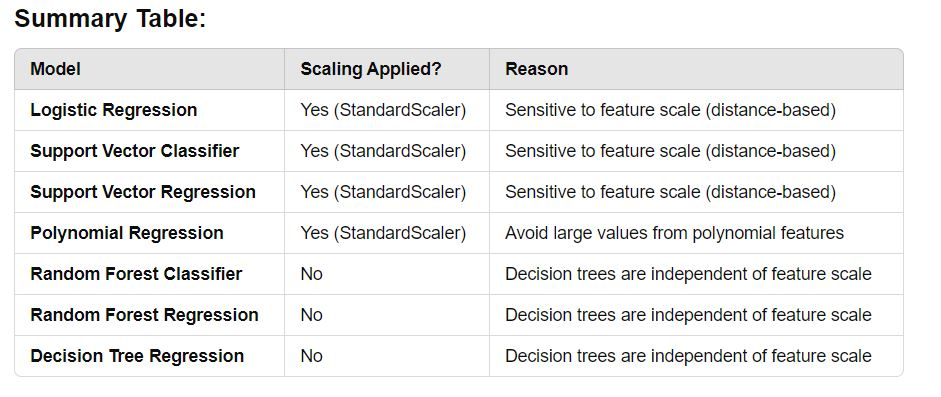

In [ ]:

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

##Support Vector Regression (SVR):
Scaling applied because SVR is also a distance-based method and highly sensitive to the scale of features.

In [ ]:

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

##Polynomial Regression
Scaling applied to ensure consistent results for polynomial transformations and avoid extremely large feature values due to polynomial expansions.

In [ ]:
# Polynomial Regression
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train_scaled)

# Re-initializing Linear Regression for Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Polynomial Regression predictions
y_pred_poly = poly_model.predict(poly_reg.fit_transform(X_test_scaled))

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluating the models
# Support Vector Regression (SVR)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

# Decision Tree Regression (DT)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

# Random Forest Regression (RF)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Polynomial Regression
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Printing the results
print("Polynomial Regression - MSE:", poly_mse, "R²:", poly_r2)
print("Support Vector Regression (SVR) - MSE:", svr_mse, "R²:", svr_r2)
print("Decision Tree Regression (DT) - MSE:", dt_mse, "R²:", dt_r2)
print("Random Forest Regression (RF) - MSE:", rf_mse, "R²:", rf_r2)

Polynomial Regression - MSE: 59049066125.220406 R²: -586872415791.8712
Support Vector Regression (SVR) - MSE: 0.09070064558052075 R²: 0.0985512476533762
Decision Tree Regression (DT) - MSE: 0.08945926096635713 R²: 0.11088902765987729
Random Forest Regression (RF) - MSE: 0.08299770034327279 R²: 0.17510870023894876


##SECOND PART CLASSIFICATION

Regression Models:

We narrowed down the feature set to improve performance and avoid overfitting since regression models tend to struggle with a large number of irrelevant features.
We used SelectKBest to choose the top features that have the most predictive power for continuous output.
Classification Models:

Classification models, especially tree-based ones like Random Forest Classifier, can handle more features, so we used the full feature set to allow the models to learn from all available data.
This approach helps classification models make better decisions in distinguishing between the two classes.



In [ ]:
# Importing necessary libraries for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Reassessing the features specifically for classification models

# We can use the full set of encoded features as input for the classification models.
# Retaining numeric and categorical encoded features:
X_classification = data_encoded.drop('y', axis=1)  # Use all features except the target
y_classification = data_encoded['y']



In [ ]:
# Splitting the dataset into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Standardizing the features for Logistic Regression and SVC
scaler = StandardScaler()
X_train_scaled_classification = scaler.fit_transform(X_train_classification)  # For Logistic Regression and SVC
X_test_scaled_classification = scaler.transform(X_test_classification)


##Logistic Regression:
Scaling applied because Logistic Regression involves distance-based calculations.

In [ ]:
# 1. Logistic Regression
log_reg_model = LogisticRegression(max_iter=500)  # Increased max_iter to ensure convergence
log_reg_model.fit(X_train_scaled_classification, y_train_classification)
y_pred_log_reg = log_reg_model.predict(X_test_scaled_classification)

##Support Vector Classifier (SVC)
Scaling applied because SVC is sensitive to feature scale, especially for non-linear kernels like RBF.

In [ ]:
# 3. Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train_scaled_classification, y_train_classification)
y_pred_svc = svc_model.predict(X_test_scaled_classification)

## Random Forest Classifier
(does not need scaling)


In [ ]:

# 2. Random Forest Classifier (does not need scaling)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_classification, y_train_classification)
y_pred_rf_clf = rf_classifier.predict(X_test_classification)

In [ ]:
# Define a function to print the classification metrics
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}\n")

# Evaluating models using classification metrics
print_classification_metrics(y_test_classification, y_pred_log_reg, "Logistic Regression")
print_classification_metrics(y_test_classification, y_pred_rf_clf, "Random Forest Classifier")
print_classification_metrics(y_test_classification, y_pred_svc, "Support Vector Classifier")

--- Logistic Regression ---
Accuracy: 0.8968196164117505
Precision: 0.6366559485530546
Recall: 0.21176470588235294
F1 Score: 0.31781701444622795

--- Random Forest Classifier ---
Accuracy: 0.891964068948774
Precision: 0.5445544554455446
Recall: 0.29411764705882354
F1 Score: 0.3819444444444444

--- Support Vector Classifier ---
Accuracy: 0.8970623937848993
Precision: 0.6283185840707964
Recall: 0.22780748663101605
F1 Score: 0.33437990580847726



##Accuracy: Measures the ratio of correct predictions.
##Precision: Out of the predicted positives, how many were actual positives.
##Recall: Out of the actual positives, how many were predicted correctly.
##F1 Score: The harmonic mean of precision and recall.

##Tuning hyperparameters

##GridSearchCV:

We create a parameter grid (param_grid) for each model, specifying the hyperparameter values to try.
GridSearchCV automatically tries all combinations of the parameters and selects the best combination based on cross-validation (cv=5).
scoring='f1': We use F1 score as the evaluation metric, but you can use accuracy, precision, or recall if needed.
Fit the Grid Search:

For each model (Logistic Regression, Random Forest, SVC), we fit the grid search on the training data. This will take some time depending on the number of parameters and combinations.
Best Params:

After the search is complete, best_params_ will display the best hyperparameters found.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Tuning
log_reg_param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']
}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=500), log_reg_param_grid, cv=5, scoring='f1')
log_reg_grid.fit(X_train_scaled_classification, y_train_classification)
print("Best Logistic Regression Params:", log_reg_grid.best_params_)

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}


In [ ]:
# Random Forest Classifier Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train_classification, y_train_classification)
print("Best Random Forest Params:", rf_grid.best_params_)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Optimized parameter grid for faster tuning
svc_param_grid = {
    'C': [1, 10],  # Fewer values for 'C'
    'kernel': ['linear', 'rbf'],  # Removed 'poly' kernel for speed
    'gamma': ['scale']  # Only 'scale' to reduce combinations
}

# Using 3-fold cross-validation to reduce processing time
svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=3, scoring='f1')

# Fit the model
svc_grid.fit(X_train_scaled_classification, y_train_classification)

# Get the best parameters
print("Best SVC Params:", svc_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
#Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
#Best Random Forest Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}

## Models Tuning Explanation
* 1. Logistic Regression Tuning:
For Logistic Regression, you might want to tune:

     C: Inverse of regularization strength (smaller values specify stronger regularization).
solver: Algorithm to use in the optimization problem (e.g., 'lbfgs', 'liblinear').
* 2. Random Forest Classifier Tuning:
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the tree.
min_samples_split: Minimum number of samples required to split an internal node.
* 3. SVC Tuning:
C: Regularization parameter.
kernel: Specifies the kernel type (e.g., 'linear', 'rbf', 'poly').
gamma: Kernel coefficient (used for 'rbf', 'poly').
* C: Regularization parameter.
kernel: Specifies the kernel type (e.g., 'linear', 'rbf', 'poly').
gamma: Kernel coefficient (used for 'rbf', 'poly').

In [ ]:
# 2. TUNED Logistic Regression (New Parameters)
log_reg_model_new = LogisticRegression(C=10, solver='liblinear', max_iter=500)  # Tuned Params
log_reg_model_new.fit(X_train_scaled_classification, y_train_classification)
y_pred_log_reg_new = log_reg_model_new.predict(X_test_scaled_classification)

In [ ]:
# 4. TUNED Random Forest Classifier (New Parameters)
rf_classifier_new = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=5, random_state=42)  # Tuned Params
rf_classifier_new.fit(X_train_classification, y_train_classification)
y_pred_rf_clf_new = rf_classifier_new.predict(X_test_classification)

In [ ]:
# Evaluating NEW models
print_classification_metrics(y_test_classification, y_pred_log_reg_new, "TUNED Logistic Regression")
print_classification_metrics(y_test_classification, y_pred_rf_clf_new, "TUNED Random Forest Classifier")

--- TUNED Logistic Regression ---
Accuracy: 0.8974265598446225
Precision: 0.6424050632911392
Recall: 0.21711229946524063
F1 Score: 0.32454036770583533

--- TUNED Random Forest Classifier ---
Accuracy: 0.8958485069191552
Precision: 0.5893271461716937
Recall: 0.2716577540106952
F1 Score: 0.3718887262079063



## OLD Models Metrics (LR), (RFC)
**--- Logistic Regression ---**
* Accuracy: 0.8968196164117505
* Precision: 0.6366559485530546
* Recall: 0.21176470588235294
* F1 Score: 0.31781701444622795

**--- Random Forest Classifier ---**
* Accuracy: 0.891964068948774
* Precision: 0.5445544554455446
* Recall: 0.29411764705882354
* F1 Score: 0.3819444444444444



##Explonation of Tuned Models's OUTPUT
* **Logistic Regression**: The tuned version is slightly better in all aspects, with improvements in accuracy, precision, recall, and F1 score.
* **Random Forest Classifier**: The tuned version has a higher accuracy and precision, but there’s a trade-off in recall and F1 score. This indicates that while it's better at avoiding false positives, it misses slightly more true positives.